In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("spam.csv")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data cleaning

In [4]:
data.shape

(5572, 5)

In [5]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.rename(columns = {"v1" :"target" , "v2":"text"},inplace=True)

In [8]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
data.duplicated().sum()

403

In [11]:
data=data.drop_duplicates(keep="first")

In [12]:
data.duplicated().sum()

0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder=LabelEncoder()

In [15]:
data["target"]=encoder.fit_transform(data["target"])

In [16]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [17]:
data.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

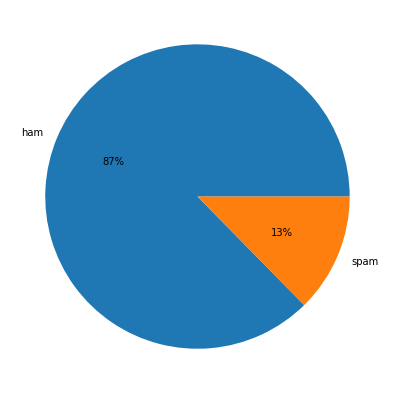

In [18]:
plt.figure(figsize=(7,7))
plt.pie(data.target.value_counts(),labels=["ham","spam"],autopct='%.0f%%')
plt.show()
#data is imbalanced

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kartikay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# finding characters 
data["characters"]=data.text.apply(len)

In [22]:
data.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# fiinding words

In [24]:
data["word"]=data["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
data.head()

,target,text,characters,word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# finding sentences

In [27]:
data["sentences"]=data["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
data.head()

,target,text,characters,word,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
data[["characters","word","sentences"]].describe()

,characters,word,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
data[data["target"]==0][["characters","word","sentences"]].describe()

,characters,word,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
data[data["target"]==1][["characters","word","sentences"]].describe()

,characters,word,sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='word', ylabel='Count'>

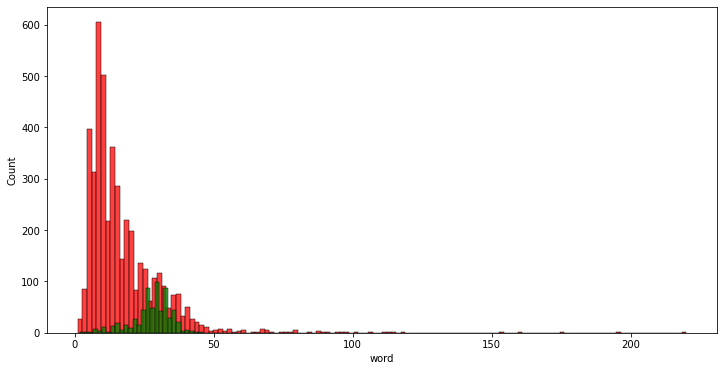

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['word'],color="red")
sns.histplot(data[data['target'] == 1]['word'],color='green')

<AxesSubplot:xlabel='characters', ylabel='Count'>

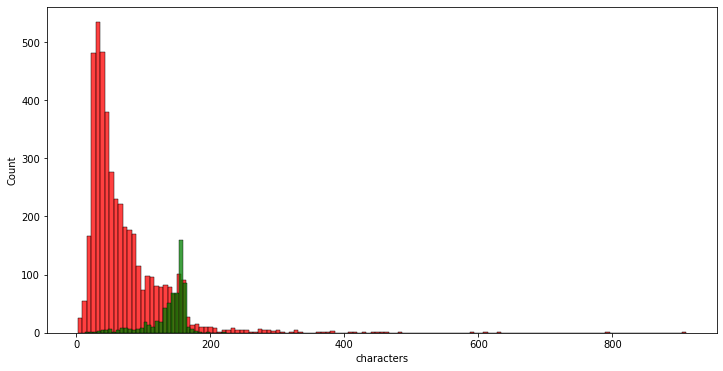

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['characters'],color="red")
sns.histplot(data[data['target'] == 1]['characters'],color='green')

<AxesSubplot:xlabel='sentences', ylabel='Count'>

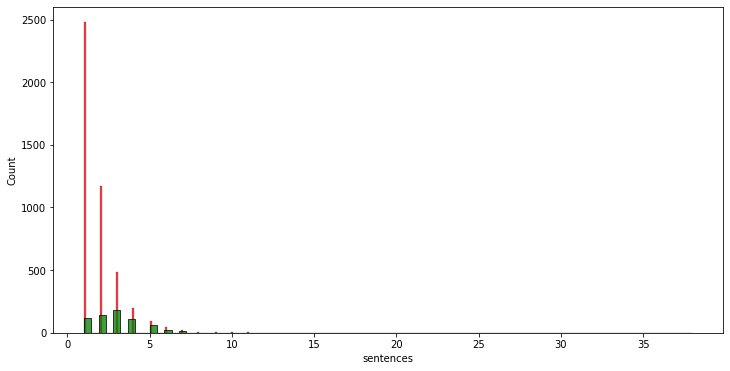

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['sentences'],color="red")
sns.histplot(data[data['target'] == 1]['sentences'],color='green')

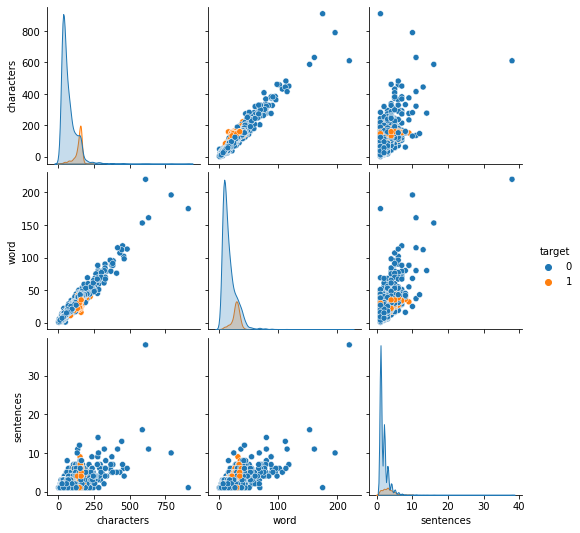

In [35]:
sns.pairplot(data,hue="target")

<AxesSubplot:>

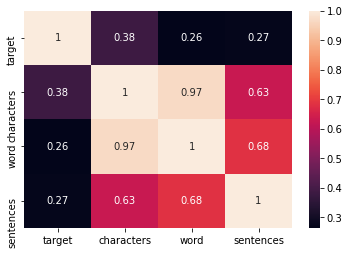

In [36]:
sns.heatmap(data.corr(),annot=True)

# Data Preprocessing

In [37]:
# lower case
# tokenization
# remove special chracters
# remove stop words and punctuation
# stemming

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kartikay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
def transform_text(text):
    text=text.lower()                     # lower case
    text=nltk.word_tokenize(text)         # tokenization 
    
    y=[]                                  # remove special Characters
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]                             # remove stop words and punctuation
    y.clear()
    
    for i in text:                        # Apply stemming
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i)) 
    
    return "  ".join(y)

In [42]:
transform_text("Satveek ## Is @ A$ GoOd %% boY,loving ,caring")

'satveek  good  boy  love  care'

In [43]:
data["transform_text"]=data.text.apply(transform_text)

In [44]:
data.head()

,target,text,characters,word,sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [46]:
X=tfidf.fit_transform(data["transform_text"]).toarray()

In [47]:
X.shape

(5169, 3000)

In [48]:
y=data.target

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB


In [51]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [53]:
gnb.fit(X_train,y_train)
predict=gnb.predict(X_test)
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))


[[773 112]
 [ 22 127]]
0.8704061895551257
0.5313807531380753


In [54]:
mnb.fit(X_train,y_train)
predict=mnb.predict(X_test)
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))


[[885   0]
 [ 33 116]]
0.9680851063829787
1.0


In [55]:
bnb.fit(X_train,y_train)
predict=bnb.predict(X_test)
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))

[[884   1]
 [ 25 124]]
0.9748549323017408
0.992


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [58]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
    
}

In [59]:
def train_Clasifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train) 
    predict=clf.predict(X_test)
    accuracy=accuracy_score(y_test,predict)
    precision=precision_score(y_test,predict)
    return accuracy,precision

In [60]:
train_Clasifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.984251968503937)

In [62]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_Clasifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.984251968503937
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8558558558558559
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9741379310344828
For  RF
Accuracy -  0.9777562862669246
Precision -  0.9921875
For  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.9758064516129032
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671328671328671
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9920634920634921
For  GBDT
Accuracy -  0.9574468085106383
Precision -  0.9646017699115044


In [65]:
performance=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values("Precision",ascending=False)

In [66]:
performance

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.968085,1.000000
5,RF,0.977756,0.992188
8,ETC,0.975822,0.992063
0,SVC,0.974855,0.984252
6,AdaBoost,0.970019,0.975806
4,LR,0.962282,0.974138
9,GBDT,0.957447,0.964602
7,BgC,0.957447,0.867133
3,DT,0.932302,0.855856
